In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shampoo="https://raw.githubusercontent.com/emanuelaf/emanuelaf.github.io/master/data/sales-of-shampoo.csv"
shampoo=pd.read_csv(shampoo)

In [3]:
shampoo.tail(5)

,Month,Sales of shampoo over a three year period
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,NaN,NaN
37,Sales of shampoo over a three year period,NaN


In [4]:
type(shampoo)
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
Month                                        37 non-null object
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


In [5]:
shampoo=pd.read_csv("https://raw.githubusercontent.com/emanuelaf/emanuelaf.github.io/master/data/sales-of-shampoo.csv"
, index_col=[0], parse_dates = True, squeeze = True)

In [6]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [7]:
type(shampoo)

pandas.core.series.Series

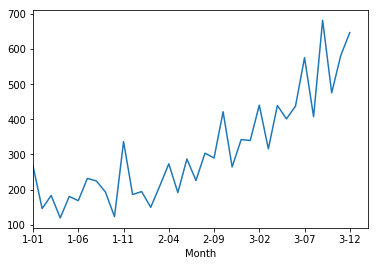

In [8]:
shampoo.plot()

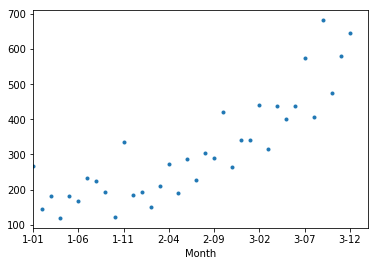

In [9]:
shampoo.plot( style= '.')

In [10]:
shampoo.size

38

In [11]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [12]:
shampoo.drop(np.nan,axis=0,inplace=True)

In [13]:
shampoo.tail(5)

Month
3-09                                         682.0
3-10                                         475.3
3-11                                         581.3
3-12                                         646.9
Sales of shampoo over a three year period      NaN
Name: Sales of shampoo over a three year period, dtype: float64

In [14]:
shampoo.drop("Sales of shampoo over a three year period",axis=0,inplace=True)

In [15]:
shampoo.size

36

In [16]:
shampoo_ma= shampoo.rolling(window=10).mean()

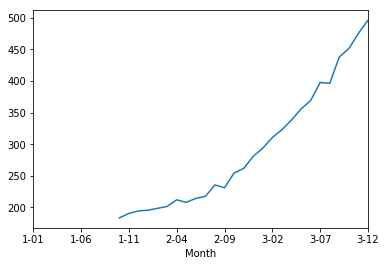

In [17]:
shampoo_ma.plot()

In [18]:
shampoo.sample(4)

Month
3-09    682.0
1-03    183.1
3-12    646.9
2-03    210.1
Name: Sales of shampoo over a three year period, dtype: float64

In [19]:
shampoo_base= pd.concat([shampoo, shampoo.shift(1)], axis=1)

In [20]:
shampoo_base.head(5)

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [21]:
shampoo_base.columns= [ 'Actual_Sales', 'Forecast_Sales']

In [22]:
shampoo_base.dropna(inplace = True)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
shampoo_error= mean_squared_error(shampoo_base.Actual_Sales, shampoo_base.Forecast_Sales)

In [25]:
shampoo_error

11715.388285714285

In [26]:
np.sqrt(shampoo_error)

108.23764726616282

In [27]:
#ARIMA(p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

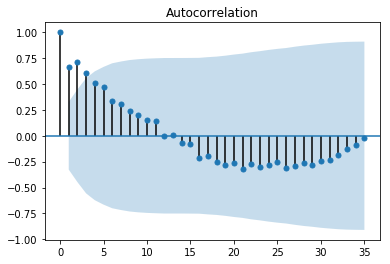

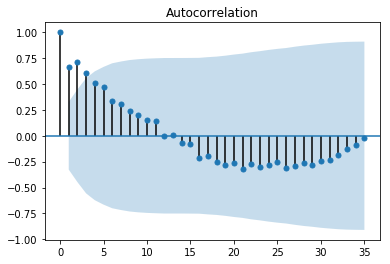

In [28]:
plot_acf(shampoo)

C:\Users\zeesh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


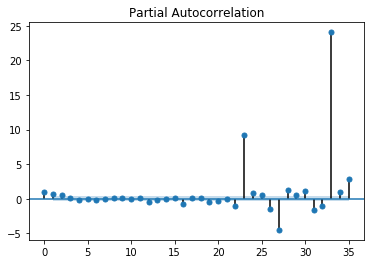

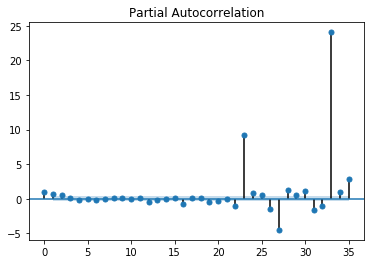

In [29]:
plot_pacf(shampoo)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
shampoo_train= shampoo[0:25]
shampoo_test= shampoo[25:36]
shampoo_model= ARIMA(shampoo_train, order=(3,1,2))

C:\Users\zeesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
shampoo_model_fit= shampoo_model.fit()

In [33]:
shampoo_model_fit.aic

272.38919480713037

In [34]:
shampoo_forecast = shampoo_model_fit.forecast(steps= 11)[0]

In [35]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.92713917809232

In [36]:
p_values= range(0,5)
d_values= range(0,5)
q_values= range(0,5)

In [37]:
import warnings
warnings.filterwarnings("ignore")

for p in p_values:
    for d in d_values:
        for q in q_values:
            order= (p,d,q)
            train, test= shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit()
                    pred_y= model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error= mean_squared_error(test,predictions)
                    print("ARIMA- %s MSE- %.2f" %(order, error))
                except:
                    continue
                    

ARIMA- (0, 0, 0) MSE- 77950.15
ARIMA- (0, 0, 1) MSE- 70119.28
ARIMA- (0, 0, 2) MSE- 58566.48
ARIMA- (0, 0, 3) MSE- 62031.35
ARIMA- (0, 1, 0) MSE- 33849.87
ARIMA- (0, 1, 1) MSE- 40654.02
ARIMA- (0, 1, 2) MSE- 34511.83
ARIMA- (0, 2, 0) MSE- 34017.03
ARIMA- (0, 2, 1) MSE- 28392.48
ARIMA- (1, 0, 0) MSE- 61158.70
ARIMA- (1, 0, 1) MSE- 46528.76
ARIMA- (1, 0, 2) MSE- 43922.40
ARIMA- (1, 0, 4) MSE- 25186.22
ARIMA- (1, 1, 0) MSE- 31687.07
ARIMA- (1, 1, 1) MSE- 42176.68
ARIMA- (1, 2, 0) MSE- 18845.84
ARIMA- (1, 2, 1) MSE- 26129.56
ARIMA- (2, 0, 0) MSE- 45248.48
ARIMA- (2, 1, 0) MSE- 35488.30
ARIMA- (2, 1, 1) MSE- 39633.97
ARIMA- (2, 1, 2) MSE- 35884.79
ARIMA- (2, 2, 0) MSE- 34024.29
ARIMA- (3, 0, 0) MSE- 46326.09
ARIMA- (3, 1, 0) MSE- 22024.88
ARIMA- (3, 1, 1) MSE- 22841.65
ARIMA- (3, 1, 2) MSE- 18095.38
ARIMA- (3, 1, 4) MSE- 37611.10
ARIMA- (3, 2, 0) MSE- 24695.30
ARIMA- (3, 2, 1) MSE- 16368.69
ARIMA- (3, 2, 2) MSE- 15804.24
ARIMA- (3, 2, 3) MSE- 14492.28
ARIMA- (4, 0, 1) MSE- 28339.17
ARIMA- (

In [39]:
ARIMA

statsmodels.tsa.arima_model.ARIMA